<a href="https://colab.research.google.com/github/hyeji0913/deeplearning/blob/main/Time_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.mount drive

In [31]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!ls -al '/gdrive/My Drive/data'

total 2171732
-rw------- 1 root root    337847 Jun 29 01:30 data_202001.csv
-rw------- 1 root root    314682 Jun 29 02:48 data_202002.csv
-rw------- 1 root root    335953 Jun 29 05:52 data_202003.csv
-rw------- 1 root root    988308 Jun 29 05:52 data_2020.csv
-rw------- 1 root root 783889122 Jun 27 00:30 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jun 27 00:50 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jun 27 01:01 TCS_영업소간통행시간_1시간_1개월_202003


#2.korean characters

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', family='NanumBarunGothic')

#3.load data

In [ ]:
import pandas as pd

In [ ]:
file = "/gdrive/My Drive/data/data_2020.csv"
data = pd.read_csv(file)

In [ ]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


In [ ]:
data['도착영업소코드'] = data['도착영업소코드'].map({105:20,110:77,115:135,120:185,125:240,130:215,135:339,140:407})

In [ ]:
data

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
37351,20200331,10,101,20,885,1
37352,20200331,8,101,407,13403,1
37353,20200331,3,101,240,7074,1
37354,20200331,10,101,77,3598,1


In [ ]:
data.rename(columns={'도착영업소코드':'거리'},inplace=True)

In [ ]:
data

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
...,...,...,...,...,...,...
37351,20200331,10,101,20,885,1
37352,20200331,8,101,407,13403,1
37353,20200331,3,101,240,7074,1
37354,20200331,10,101,77,3598,1


#4.linear regression by tensorflow

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
Selected_Date = '2020-01-10' #@param {type:"date"}
input_date = int(Selected_Date.replace('-',''))
print(input_date)

20200110


In [ ]:
data_date = data[data['집계일자'] == input_date]

In [ ]:
data_date

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
3570,20200110,9,101,20,778,4
3571,20200110,9,101,20,862,4
3572,20200110,9,101,20,739,4
3573,20200110,9,101,20,852,4
3574,20200110,9,101,20,874,4
...,...,...,...,...,...,...
8440,20200110,2,101,135,7556,4
8442,20200110,6,101,135,6902,4
8447,20200110,7,101,215,8207,4
8448,20200110,3,101,135,4560,4


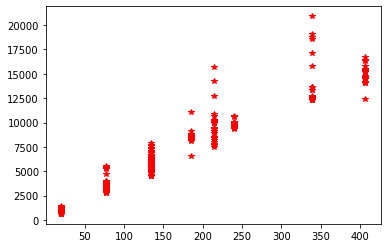

In [ ]:
plt.plot(data_date['거리'], data_date['통행시간'],'r*')

In [ ]:
data_time = data_date.groupby(['집계일자','거리'])['통행시간'].mean()

In [ ]:
data_time

집계일자      거리 
20200110  20       880.007353
          77      3545.876190
          135     5816.191781
          185     8557.842105
          215     9592.600000
          240     9795.133333
          339    14371.681818
          407    15032.960000
Name: 통행시간, dtype: float64

In [ ]:
data_out = data_time.reset_index()

In [ ]:
data_out

,집계일자,거리,통행시간
0,20200110,20,880.007353
1,20200110,77,3545.876190
2,20200110,135,5816.191781
3,20200110,185,8557.842105
4,20200110,215,9592.600000
5,20200110,240,9795.133333
6,20200110,339,14371.681818
7,20200110,407,15032.960000


In [ ]:
data_list = data_out.values.tolist()
data_list

[[20200110.0, 20.0, 880.0073529411765],
 [20200110.0, 77.0, 3545.8761904761905],
 [20200110.0, 135.0, 5816.191780821918],
 [20200110.0, 185.0, 8557.842105263158],
 [20200110.0, 215.0, 9592.6],
 [20200110.0, 240.0, 9795.133333333333],
 [20200110.0, 339.0, 14371.681818181818],
 [20200110.0, 407.0, 15032.96]]

In [ ]:
x_train = [ int(r[1]) for r in data_list ]
y_train = [ int(r[2]/10) for r in data_list]


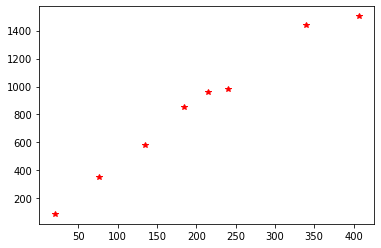

In [ ]:
plt.plot(x_train, y_train, 'r*')

In [ ]:
learning_rate = 1e-8
learning_epochs = 2000

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)

mse = tf.keras.losses.mean_squared_error
model.compile(loss=mse, optimizer=sgd)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
1/1 [==============================] - 1s 998ms/step - loss: 522977.1875
Epoch 2/2000
1/1 [==============================] - 0s 19ms/step - loss: 521831.9375
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 520689.2812
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 519549.1250
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 518411.4688
Epoch 6/2000
1/1 [==============================] - 0s 14ms/step - loss: 517276.4062
Epoch 7/2000
1/1 [==============================] - 0s 12ms/step - loss: 516143.8125
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 515013.7500
Epoch 9/2000
1/1 [==============================] - 0s 15ms/step - loss: 513886.1562
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 512761.0938
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 511638.4375
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step

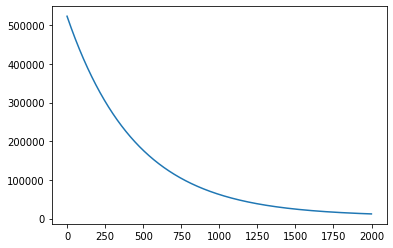

In [35]:
plt.plot(history.history['loss'])
plt.show()

In [39]:
data_out

,집계일자,거리,통행시간
0,20200110,20,880.007353
1,20200110,77,3545.876190
2,20200110,135,5816.191781
3,20200110,185,8557.842105
4,20200110,215,9592.600000
5,20200110,240,9795.133333
6,20200110,339,14371.681818
7,20200110,407,15032.960000


In [38]:
Distance = 312 #@param {type:"slider",min:0, max:500, step:1}
input_data = [Distance]
predicted_value = model.predict(input_data)

print('%3d km takes %5.1f seconds on %s' %(Distance, predicted_value[0][0]*10,Selected_Date))

312 km takes 11673.6 seconds on 2020-01-10
